Сегодня мы поговорим о морфологических анализаторах для русского языка и некоторых других языков.  

http://web-corpora.net/wsgi/mystemplus.wsgi/mystemplus/compare_table/ сравнение тэггеров.  

Не забудьте установить нужные библиотеки.

In [29]:
!pip install pymystem3

In [30]:
import re

In [31]:
text_rus = '''И пунша пламень голубой.
Люблю воинственную живость
Потешных Марсовых полей,
Пехотных ратей и коней
Однообразную красивость,
В их стройно зыблемом строю
Лоскутья сих знамён победных,
Сиянье шапок этих медных,
Насквозь простреленных в бою.'''

Токенизация через nltk:

In [32]:
from nltk.tokenize import word_tokenize

In [33]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [34]:
text_tokens_nltk = word_tokenize(text_rus)
print(text_tokens_nltk)

['И', 'пунша', 'пламень', 'голубой', '.', 'Люблю', 'воинственную', 'живость', 'Потешных', 'Марсовых', 'полей', ',', 'Пехотных', 'ратей', 'и', 'коней', 'Однообразную', 'красивость', ',', 'В', 'их', 'стройно', 'зыблемом', 'строю', 'Лоскутья', 'сих', 'знамён', 'победных', ',', 'Сиянье', 'шапок', 'этих', 'медных', ',', 'Насквозь', 'простреленных', 'в', 'бою', '.']


Mystem -- свободно распространяемая библиотека с закрытым кодом. Майстем сам умеет токенизировать. Он устанавливает словарную форму (лемму), определяет часть речи и даёт разную морфологическую информацию, при этом выбирая один из наиболее вероятных разборов.

In [35]:
from pymystem3 import Mystem

# сохраняем класс в переменную
mystem = Mystem()

In [36]:
text_analyzed = mystem.analyze(text_rus)
text_analyzed

[{'analysis': [{'lex': 'и', 'wt': 0.9999770357, 'gr': 'CONJ='}], 'text': 'И'},
 {'text': ' '},
 {'analysis': [{'lex': 'пунш', 'wt': 1, 'gr': 'S,муж,неод=род,ед'}],
  'text': 'пунша'},
 {'text': ' '},
 {'analysis': [{'lex': 'пламень',
    'wt': 1,
    'gr': 'S,неод=(им,ед,муж|вин,ед,муж)'}],
  'text': 'пламень'},
 {'text': ' '},
 {'analysis': [{'lex': 'голубой',
    'wt': 0.9983341496,
    'gr': 'A=(вин,ед,полн,муж,неод|им,ед,полн,муж|пр,ед,полн,жен|дат,ед,полн,жен|род,ед,полн,жен|твор,ед,полн,жен)'}],
  'text': 'голубой'},
 {'text': '.'},
 {'text': '\n'},
 {'analysis': [{'lex': 'любить',
    'wt': 1,
    'gr': 'V,несов,пе=непрош,ед,изъяв,1-л'}],
  'text': 'Люблю'},
 {'text': ' '},
 {'analysis': [{'lex': 'воинственный', 'wt': 1, 'gr': 'A=вин,ед,полн,жен'}],
  'text': 'воинственную'},
 {'text': ' '},
 {'analysis': [{'lex': 'живость', 'wt': 1, 'gr': 'S,жен,неод=(вин,ед|им,ед)'}],
  'text': 'живость'},
 {'text': '\n'},
 {'analysis': [{'lex': 'потешный',
    'wt': 1,
    'gr': 'A=(пр,мн,пол

In [37]:
print(text_analyzed[4])

{'analysis': [{'lex': 'пламень', 'wt': 1, 'gr': 'S,неод=(им,ед,муж|вин,ед,муж)'}], 'text': 'пламень'}


In [38]:
print(type(text_analyzed))

<class 'list'>


Можно делать отдельные вещи:

In [39]:
text_lemmatized = mystem.lemmatize(text_rus)
print(text_lemmatized)

['и', ' ', 'пунш', ' ', 'пламень', ' ', 'голубой', '.', '\n', 'любить', ' ', 'воинственный', ' ', 'живость', '\n', 'потешный', ' ', 'марсовой', ' ', 'поле', ',\n', 'пехотный', ' ', 'рать', ' ', 'и', ' ', 'конь', '\n', 'однообразный', ' ', 'красивость', ',\n', 'в', ' ', 'их', ' ', 'стройно', ' ', 'зыбить', ' ', 'строй', '\n', 'лоскут', ' ', 'сей', ' ', 'знамя', ' ', 'победный', ',\n', 'сияние', ' ', 'шапка', ' ', 'этот', ' ', 'медный', ',\n', 'насквозь', ' ', 'прострелить', ' ', 'в', ' ', 'бой', '.', '\n']


Можно склеить всё в один лемматизированный текст:

In [40]:
new_text_lemmatized = ''.join(text_lemmatized)
print(new_text_lemmatized)

и пунш пламень голубой.
любить воинственный живость
потешный марсовой поле,
пехотный рать и конь
однообразный красивость,
в их стройно зыбить строй
лоскут сей знамя победный,
сияние шапка этот медный,
насквозь прострелить в бой.



In [41]:
# сделаем все красиво с индексами и доступом по ключам

print('Слово - ', text_analyzed[0]['text'])
print('Разбор слова - ', text_analyzed[0]['analysis'][0])
print('Лемма слова - ', text_analyzed[0]['analysis'][0]['lex'])
print('Грамматическая информация слова2 - ', text_analyzed[0]['analysis'][0]['gr'])

Слово -  И
Разбор слова -  {'lex': 'и', 'wt': 0.9999770357, 'gr': 'CONJ='}
Лемма слова -  и
Грамматическая информация слова2 -  CONJ=


In [42]:
text_analyzed[0] #чтобы понять, что происходит наверху

{'analysis': [{'lex': 'и', 'wt': 0.9999770357, 'gr': 'CONJ='}], 'text': 'И'}

Функция, чтобы прикрепить частеречные теги к словам

In [43]:
def process_mystem_analysis(analysis_results):
    """
    Преобразует результаты анализа mystem в список токенов формата "слово_ЧастьРечи"

    Параметры:
    analysis_results (list): Результат работы метода mystem.analyze()

    Возвращает:
    list: Список строк в формате "слово_ЧастьРечи"
    """
    result_tokens = []

    for item in analysis_results:
        # Пропускаем пробелы и знаки препинания
        if item.get('text', '').strip() == '' or 'analysis' not in item:
            continue

        # Получаем текст токена
        token_text = item['text'].lower()

        # Если есть анализ и он не пустой
        if 'analysis' in item and item['analysis']:
            # Берем первый (наиболее вероятный) вариант анализа
            first_analysis = item['analysis'][0]

            # Извлекаем часть речи из поля 'gr'
            if 'gr' in first_analysis:
                # Извлекаем первую часть до запятой или знака равенства
                pos_tag = first_analysis['gr'].split(',')[0].split('=')[0]

                # Формируем токен в формате "слово_ЧастьРечи"
                formatted_token = f"{token_text}_{pos_tag}"
                result_tokens.append(formatted_token)
            else:
                # Если нет информации о части речи, добавляем просто слово
                result_tokens.append(token_text)
        else:
            # Если нет анализа, добавляем просто слово
            result_tokens.append(token_text)

    return result_tokens

In [44]:
# Преобразование в список токенов
tagged_tokens = process_mystem_analysis(text_analyzed)

# Вывод результата
print(" ".join(tagged_tokens))

и_CONJ пунша_S пламень_S голубой_A люблю_V воинственную_A живость_S потешных_A марсовых_S полей_S пехотных_A ратей_S и_CONJ коней_S однообразную_A красивость_S в_PR их_APRO стройно_ADV зыблемом_V строю_S лоскутья_S сих_APRO знамён_S победных_A сиянье_S шапок_S этих_APRO медных_A насквозь_ADV простреленных_V в_PR бою_S


Можно посмотреть предсказания для отдельных слов:

In [45]:
mystem.analyze('стекла')

[{'analysis': [{'lex': 'стекло',
    'wt': 0.9946103594,
    'gr': 'S,сред,неод=(вин,мн|род,ед|им,мн)'}],
  'text': 'стекла'},
 {'text': '\n'}]

In [46]:
mystem.analyze('стали')

[{'analysis': [{'lex': 'становиться',
    'wt': 0.9821285244,
    'gr': 'V,нп=прош,мн,изъяв,сов'}],
  'text': 'стали'},
 {'text': '\n'}]

In [47]:
mystem.analyze('стекла и стали нам не хватает')

[{'analysis': [{'lex': 'стекло',
    'wt': 0.9946103594,
    'gr': 'S,сред,неод=(вин,мн|род,ед|им,мн)'}],
  'text': 'стекла'},
 {'text': ' '},
 {'analysis': [{'lex': 'и', 'wt': 0.9999770357, 'gr': 'CONJ='}], 'text': 'и'},
 {'text': ' '},
 {'analysis': [{'lex': 'становиться',
    'wt': 0.9821285244,
    'gr': 'V,нп=прош,мн,изъяв,сов'}],
  'text': 'стали'},
 {'text': ' '},
 {'analysis': [{'lex': 'мы', 'wt': 1, 'gr': 'SPRO,мн,1-л=дат'}],
  'text': 'нам'},
 {'text': ' '},
 {'analysis': [{'lex': 'не', 'wt': 1, 'gr': 'PART='}], 'text': 'не'},
 {'text': ' '},
 {'analysis': [{'lex': 'хватать',
    'wt': 1,
    'gr': 'V,несов=(непрош,ед,изъяв,3-л|непрош,изъяв)'}],
  'text': 'хватает'},
 {'text': '\n'}]

In [48]:
mystem.analyze('кринжевать')

[{'analysis': [{'lex': 'кринжевать',
    'wt': 0.1624500426,
    'qual': 'bastard',
    'gr': 'V,несов,пе=инф'},
   {'lex': 'кринжевать',
    'wt': 0.1612166906,
    'qual': 'bastard',
    'gr': 'V,несов,нп=инф'}],
  'text': 'кринжевать'},
 {'text': '\n'}]

In [49]:
mystem.analyze('Глокая куздра штеко будланула бокра и курдячит бокрёнка')

[{'analysis': [{'lex': 'глокай',
    'wt': 0.09304979929,
    'qual': 'bastard',
    'gr': 'S,муж,неод=род,ед'}],
  'text': 'Глокая'},
 {'text': ' '},
 {'analysis': [{'lex': 'куздра',
    'wt': 0.6292693823,
    'qual': 'bastard',
    'gr': 'S,ед,жен,неод=им'}],
  'text': 'куздра'},
 {'text': ' '},
 {'analysis': [{'lex': 'штеко',
    'wt': 0.2574119755,
    'qual': 'bastard',
    'gr': 'ADV='}],
  'text': 'штеко'},
 {'text': ' '},
 {'analysis': [{'lex': 'будланул',
    'wt': 0.03753661836,
    'qual': 'bastard',
    'gr': 'S,муж,од=(вин,ед|род,ед)'}],
  'text': 'будланула'},
 {'text': ' '},
 {'analysis': [{'lex': 'бокра',
    'wt': 0.8898982327,
    'qual': 'bastard',
    'gr': 'S,ед,жен,неод=им'}],
  'text': 'бокра'},
 {'text': ' '},
 {'analysis': [{'lex': 'и', 'wt': 0.9999770357, 'gr': 'CONJ='}], 'text': 'и'},
 {'text': ' '},
 {'analysis': [{'lex': 'курдячить',
    'wt': 0.5,
    'qual': 'bastard',
    'gr': 'V,обсц,сов,пе=непрош,ед,изъяв,3-л'}],
  'text': 'курдячит'},
 {'text': ' '}

Некоторые вещи, которые могут встретиться в нотации:  

const (  
	Dictionary  = 0        // слово из словаря  
	Bastard     = 1        // не словарное  
	Sob         = 2        // из "быстрого словаря"  
	Prefixoid   = 4        // словарное + стандартный префикс (авто- мото- кино- фото-) всегда в компании с Bastard или Sob  
	Foundling   = 8        // непонятный набор букв, но проходящий в алфавит  
	BadRequest  = 16       // доп. флаг.: "плохая лемма" при наличии "хорошей" альтернативы ("махать" по форме "маша")  
	FromEnglish = 65536    // переведено с английского  
	ToEnglish   = 131072   // переведено на английский  
	Untranslit  = 262144   // "переведено" с транслита  
	Overrode    = 1048576  // текст леммы был перезаписан  
	Fix         = 16777216 // слово из фикс-листа  
    
https://pkg.go.dev/github.com/dveselov/mystem#section-readme

In [50]:
mystem.analyze('мы стали более лучше одеваться')

[{'analysis': [{'lex': 'мы', 'wt': 1, 'gr': 'SPRO,мн,1-л=им'}], 'text': 'мы'},
 {'text': ' '},
 {'analysis': [{'lex': 'становиться',
    'wt': 0.9821285244,
    'gr': 'V,нп=прош,мн,изъяв,сов'}],
  'text': 'стали'},
 {'text': ' '},
 {'analysis': [{'lex': 'более', 'wt': 0.9999468251, 'gr': 'ADV='}],
  'text': 'более'},
 {'text': ' '},
 {'analysis': [{'lex': 'хорошо', 'wt': 0.5632475519, 'gr': 'ADV=срав,вводн'}],
  'text': 'лучше'},
 {'text': ' '},
 {'analysis': [{'lex': 'одеваться', 'wt': 1, 'gr': 'V,нп=инф,несов'}],
  'text': 'одеваться'},
 {'text': '\n'}]

In [51]:
mystem.analyze('сплав стали')

[{'analysis': [{'lex': 'сплав', 'wt': 1, 'gr': 'S,муж,неод=(вин,ед|им,ед)'}],
  'text': 'сплав'},
 {'text': ' '},
 {'analysis': [{'lex': 'становиться',
    'wt': 0.9821285244,
    'gr': 'V,нп=прош,мн,изъяв,сов'}],
  'text': 'стали'},
 {'text': '\n'}]

Плюсы Mystem:
- В целом высокое качество;
- Разрешается омонимия;
- Учитывается контекст при разборе;
- Основан на разметке НКРЯ.

Минусы Mystem:
- Медленный;  
- Требует некоторой работы для вывода на экран в удобочитаемом виде.

NLTK для английского языка

In [52]:
from nltk.tokenize import word_tokenize
import nltk

Список тэгов (Universal dependencies): https://universaldependencies.org/u/pos/
Список частеречных тэгов (Penn): https://cs.nyu.edu/~grishman/jet/guide/PennPOS.html   

In [53]:
nltk.download('universal_tagset')

[nltk_data] Downloading package universal_tagset to /root/nltk_data...
[nltk_data]   Package universal_tagset is already up-to-date!


True

In [54]:
nltk.download('averaged_perceptron_tagger_eng')

[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!


True

In [55]:
text_2 = 'I love cats.'
text_tok = word_tokenize(text_2) #мы импортировали уже знакомый вам токенизатор из NLTK. Токенизация нужна для разметки в этой библиотеке
tagged = nltk.pos_tag(text_tok)
tagged

[('I', 'PRP'), ('love', 'VBP'), ('cats', 'NNS'), ('.', '.')]

In [56]:
text_tok = word_tokenize(text_rus)
tagged = nltk.pos_tag(text_tok, lang='rus') #тэгсет похож на НКРЯ
tagged

LookupError: 
**********************************************************************
  Resource [93maveraged_perceptron_tagger_rus[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('averaged_perceptron_tagger_rus')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mtaggers/averaged_perceptron_tagger_rus/[0m

  Searched in:
    - '/root/nltk_data'
    - '/usr/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/local/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/local/lib/nltk_data'
**********************************************************************


Можно "подклеить" для удобства тэги к слову.

In [ ]:
list_of_tagged = []
for elem in tagged:
    tag_tog = '_'.join(elem)
    list_of_tagged.append(tag_tog)
print(list_of_tagged)

In [ ]:
# Имя файла
text = "text_morph.txt"

# Чтение файла
with open(text, 'r', encoding='utf-8') as file:
    txt = file.read()

print(f"Файл успешно прочитан. Длина текста: {len(txt)} символов")
print(f"Тип переменной text_string: {type(txt)}")
txt[0:50]

In [ ]:
tagged_list = []
tokenized_txt = word_tokenize(txt)
for tagged_w in nltk.pos_tag(tokenized_txt, tagset='universal'):
  tagged_list.append('_'.join(tagged_w))
print(' '.join(tagged_list))
resulting_text = ' '.join(tagged_list)

Сколько у нас частей речи определенного вида?

In [ ]:
#для этого нам понадобятся регулярные выражения
number_of_pos = re.findall('[a-zA-Z]+_ADJ', resulting_text)
print(f'Your text has {len(number_of_pos)} adjectives.')

In [ ]:
from nltk import FreqDist

In [ ]:
nltk.download("stopwords")

In [ ]:
from nltk.corpus import stopwords

Посмотрим на распределение без учёта частей речи:

In [ ]:
stop_words = set(stopwords.words("english"))

In [ ]:
filtered_list = []
for word in tokenized_txt:
  if word.casefold() not in stop_words:
    filtered_list.append(word)
    new_text = ' '.join(filtered_list) #второй этап - убрали стоп-слова

    tokenizedtxt = word_tokenize(new_text.lower())
    frequency_distribution_1 = FreqDist(tokenizedtxt)

In [ ]:
frequency_distribution_1.plot(30, cumulative=False)

Повторим то же самое, только с учётом частеречных тэгов:

In [ ]:
tagged_words = nltk.pos_tag(tokenized_txt, tagset='universal')

tagged_list = ['_'.join(tagged_w) for tagged_w in tagged_words]

resulting_text = ' '.join(tagged_list)

processed_tokens = word_tokenize(resulting_text.lower())

frequency_distribution_2 = FreqDist(processed_tokens)


In [ ]:
frequency_distribution_2.plot(30, cumulative=False)

**Задание 1.** Извлеките ключевые слова из любых 2х текстов на английском и русском языке (не менее 4000 символов) тремя способами:  
    1) Используя просто токены;  
    2) Разметив на части речи;  
    3) Оставив только леммы или стеммы. Отличаются ли результат в топ-30?   
Визуализируйте с помощью frequency_distribution.plot. и библиотеки matplotlib

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package universal_tagset to /root/nltk_data...
[nltk_data]   Package universal_tagset is already up-to-date!


Длина английского текста: 3013 символов
Длина русского текста: 4963 символов
АНГЛИЙСКИЙ ТЕКСТ
Способ 1: 711 простых токенов

Топ-10 простых токенов:
,: 38
.: 28
``: 23
'': 23
of: 22
you: 21
to: 16
a: 15
that: 13
the: 13

Способ 2: 711 токенов с POS-тегами

Топ-10 токенов с POS-тегами:
,_.: 38
._.: 28
``_.: 23
''_.: 23
of_ADP: 22
you_PRON: 21
to_PRT: 16
a_DET: 15
the_DET: 13
is_VERB: 12

Способ 3: 380 токенов без стоп-слов

Топ-10 токенов без стоп-слов:
,: 38
.: 28
``: 23
'': 23
mr.: 8
must: 7
?: 7
dear: 6
;: 6
!: 6

РУССКИЙ ТЕКСТ
Способ 1: 924 простых токенов

Топ-10 простых токенов:
, : 97
и: 39
. : 26
в: 20
с: 15
— : 13
на: 11
.: 11
о: 8
он: 8

Способ 2: 735 токенов с POS-тегами

Топ-10 токенов с POS-тегами:
и_CONJ: 39
в_PR: 20
с_PR: 15
на_PR: 11
о_PR: 8
он_SPRO: 8
у_PR: 6
не_PART: 6
так_ADVPRO: 6
или_CONJ: 5

Способ 3: 931 лемматизированных токенов

Топ-10 лемм:
,: 106
и: 39
.: 37
—: 28
в: 20
с: 15
он: 12
быть: 12
на: 11
она: 9

ВИЗУАЛИЗАЦИЯ РЕЗУЛЬТАТОВ


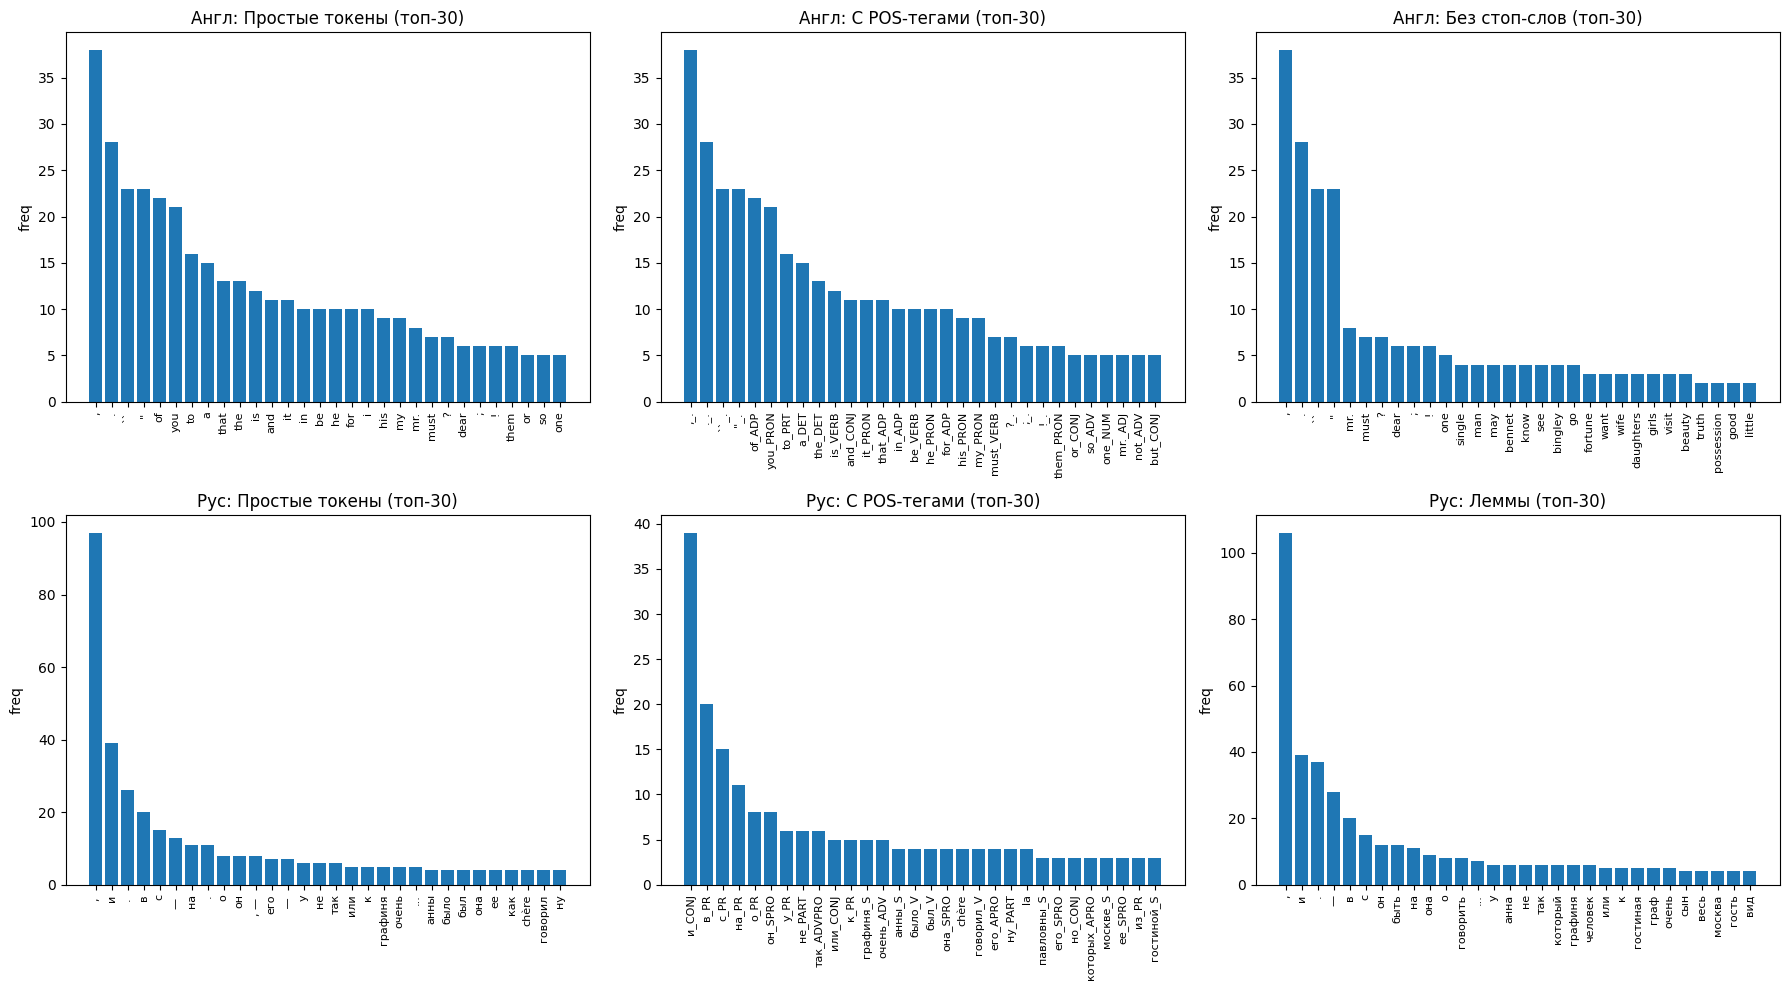


СРАВНЕНИЕ ТОП-30 КЛЮЧЕВЫХ СЛОВ

АНГЛИЙСКИЙ ТЕКСТ:
Уникальных в простые токены: 19
Уникальных в с POS-тегами: 30
Уникальных в без стоп-слов: 19
Общих для всех трех способов: 0

РУССКИЙ ТЕКСТ:
Уникальных в простые токены: 13
Уникальных в с POS-тегами: 29
Уникальных в леммы: 14
Общих для всех трех способов: 0


In [57]:
!pip install -q pymystem3 nltk


import re
import nltk
from nltk.tokenize import word_tokenize
from nltk import FreqDist
from nltk.corpus import stopwords

import matplotlib.pyplot as plt
from pymystem3 import Mystem

nltk.download("punkt")
nltk.download("averaged_perceptron_tagger_eng")
nltk.download("stopwords")
nltk.download("universal_tagset")

mystem = Mystem()

text_rus = """
Князь Василий исполнил обещание, данное на вечере у Анны Павловны княгине Друбецкой, просившей его о своем единственном сыне Борисе. О нем было доложено государю, и, не в пример другим, он был переведен в гвардии Семеновский полк прапорщиком. Но адъютантом или состоящим при Кутузове Борис так и не был назначен, несмотря на все хлопоты и происки Анны Михайловны. Вскоре после вечера Анны Павловны Анна Михайловна вернулась в Москву, прямо к своим богатым родственникам Ростовым, у которых она стояла в Москве и у которых с детства воспитывался и годами живал ее обожаемый Боренька, только что произведенный в армейские и тотчас переведенный в гвардейские прапорщики. Гвардия уже вышла из Петербурга 10-го августа, и сын, оставшийся для обмундирования в Москве, должен был догнать ее по дороге в Радзивилов.
У Ростовых были именинницы Натальи — мать и меньшая дочь. С утра не переставая подъезжали и отъезжали цуги, подвозившие поздравителей к большому, всей Москве известному дому графини Ростовой на Поварской. Графиня с красивой старшею дочерью и гостями, не перестававшими сменять один другого, сидели в гостиной.
Графиня была женщина с восточным типом худого лица, лет сорока пяти, видимо, изнуренная детьми, которых у ней было двенадцать человек. Медлительность ее движений и говора, происходившая от слабости сил, придавала ей значительный вид, внушавший уважение. Княгиня Анна Михайловна Друбецкая, как домашний человек, сидела тут же, помогая в деле принимания и занимания разговором гостей. Молодежь была в задних комнатах, не находя нужным участвовать в приеме визитов. Граф встречал и провожал гостей, приглашая всех к обеду.
— Очень, очень вам благодарен, ma chère или mon cher 1 (ma chère или mon cher он говорил всем без исключения, без малейших оттенков, как выше, так и ниже его стоявшим людям), за себя и за дорогих именинниц. Смотрите же, приезжайте обедать. Вы меня обидите, mon cher. Душевно прошу вас от всего семейства, ma chère. — Эти слова с одинаким выражением на полном, веселом и чисто выбритом лице и с одинаково крепким пожатием руки и повторяемыми короткими поклонами говорил он всем без исключения и изменения. Проводив одного гостя, граф возвращался к тому или той, которые были еще в гостиной; придвинув кресла и с видом человека, любящего и умеющего пожить, молодецки расставив ноги и положив на колена руки, он значительно покачивался, предлагал догадки о погоде, советовался о здоровье, иногда на русском, иногда на очень дурном, но самоуверенном французском языке, и снова с видом усталого, но твердого в исполнении обязанности человека шел провожать, оправляя редкие седые волосы на лысине, и опять звал обедать. Иногда, возвращаясь из передней, он заходил через цветочную и официантскую в большую мраморную залу, где накрывали стол на восемьдесят кувертов, и, глядя на официантов, носивших серебро и фарфор, раздвигавших столы и развертывавших камчатные скатерти, подзывал к себе Дмитрия Васильевича, дворянина, занимавшегося всеми его делами, и говорил:
— Ну, ну, Митенька, смотри, чтобы все было хорошо. Так, так, — говорил он, с удовольствием оглядывая огромный раздвинутый стол. — Главное — сервировка. То-то... — И он уходил, самодовольно вздыхая, опять в гостиную.
— Марья Львовна Карагина с дочерью! — басом доложил огромный графинин выездной лакей, входя в двери гостиной. Графиня подумала и понюхала из золотой табакерки с портретом мужа.
— Замучили меня эти визиты, — сказала она. — Ну, уж ее последнюю приму. Чопорна очень. Проси, — сказала она лакею грустным голосом, как будто говорила: «Ну, уж добивайте».
Высокая, полная, с гордым видом дама с круглолицею улыбающеюся дочкой, шумя платьями, вошли в гостиную.
— Chère comtesse, il y a si longtemps... elle a été alitée, la pauvre enfant... au bal des Razoumovsky... et la comtesse Apraksine... j'ai été si heureuse... 2 — послышались оживленные женские голоса, перебивая один другой и сливаясь с шумом платьев и придвиганием стульев. Начался тот разговор, который затевают ровно настолько, чтобы при первой паузе встать, зашуметь платьями, проговорить: «Je suis bien charmée; la santé de maman... et la comtesse Apraksine» 3, — и опять, зашумев платьями, пройти в переднюю, надеть шубу или плащ и уехать. Разговор зашел о главной городской новости того времени — о болезни известного богача и красавца екатерининского времени старого графа Безухова и о его незаконном сыне Пьере, который так неприлично вел себя на вечере у Анны Павловны Шерер.
— Я очень жалею бедного графа, — говорила гостья, — здоровье его и так было плохо, а теперь это огорченье от сына. Это его убьет!
— Что такое? — спросила графиня, как будто не зная, о чем говорит гостья, хотя она раз пятнадцать уже слышала причину огорчения графа Безухова.
— Вот нынешнее воспитание! Еще за границей, — продолжала гостья, — этот молодой человек предоставлен был самому себе, и теперь в Петербурге, говорят, он такие ужасы наделал, что его с полицией выслали оттуда.
— Скажите! — сказала графиня.
"""

text_eng = """
Pride and Prejudice. Chapter 1.

It is a truth universally acknowledged, that a single man in possession of a good fortune, must be in want of a wife.

However little known the feelings or views of such a man may be on his first entering a neighbourhood, this truth is so well fixed in the minds of the surrounding families, that he is considered the rightful property of some one or other of their daughters.

"My dear Mr. Bennet," said his lady to him one day, "have you heard that Netherfield Park is let at last?"

Mr. Bennet replied that he had not.

"But it is," returned she; "for Mrs. Long has just been here, and she told me all about it."

Mr. Bennet made no answer.

"Do you not want to know who has taken it?" cried his wife impatiently.

"You want to tell me, and I have no objection to hearing it."

This was invitation enough.

"Why, my dear, you must know, Mrs. Long says that Netherfield is taken by a young man of large fortune from the north of England; that he came down on Monday in a chaise and four to see the place, and was so much delighted with it, that he agreed with Mr. Morris immediately; that he is to take possession before Michaelmas, and some of his servants are to be in the house by the end of next week."

"What is his name?"

"Bingley."

"Is he married or single?"

"Oh! Single, my dear, to be sure! A single man of large fortune; four or five thousand a year. What a fine thing for our girls!"

"How so? How can it affect them?"

"My dear Mr. Bennet," replied his wife, "how can you be so tiresome! You must know that I am thinking of his marrying one of them."

"Is that his design in settling here?"

"Design! Nonsense, how can you talk so! But it is very likely that he may fall in love with one of them, and therefore you must visit him as soon as he comes."

"I see no occasion for that. You and the girls may go, or you may send them by themselves, which perhaps will be still better, for as you are as handsome as any of them, Mr. Bingley might like you the best of the party."

"My dear, you flatter me. I certainly have had my share of beauty, but I do not pretend to be anything extraordinary now. When a woman has five grown-up daughters, she ought to give over thinking of her own beauty."

"In such cases, a woman has not often much beauty to think of."

"But, my dear, you must indeed go and see Mr. Bingley when he comes into the neighbourhood."

"It is more than I engage for, I assure you."

"But consider your daughters. Only think what an establishment it would be for one of them. Sir William and Lady Lucas are determined to go, merely on that account, for in general, you know, they visit no newcomers. Indeed you must go, for it will be impossible for us to visit him if you do not."

"You are over-scrupulous, surely. I dare say Mr. Bingley will be very glad to see you; and I will send a few lines by you to assure him of my hearty consent to his marrying whichever he chooses of the girls; though I must throw in a good word for my little Lizzy."
"""

print(f"Длина английского текста: {len(text_eng)} символов")
print(f"Длина русского текста: {len(text_rus)} символов")

def process_mystem_analysis(analysis_results):
    """
    Convert pymystem3 analyze() output to tokens like: "слово_POS"
    (POS is taken from gr field before ',' and '=')
    """
    result_tokens = []
    for item in analysis_results:
        if item.get("text", "").strip() == "" or "analysis" not in item:
            continue

        token_text = item["text"].lower()

        if item.get("analysis"):
            first_analysis = item["analysis"][0]
            gr = first_analysis.get("gr")
            if gr:
                pos_tag = gr.split(",")[0].split("=")[0]
                result_tokens.append(f"{token_text}_{pos_tag}")
            else:
                result_tokens.append(token_text)
        else:
            result_tokens.append(token_text)

    return result_tokens


def plot_freqdist(ax, fdist, n=30, title=""):
    """
    Plot top-n items from an NLTK FreqDist into a provided matplotlib axis.
    (This avoids FreqDist.plot(ax=...), which is not supported.)
    """
    pairs = fdist.most_common(n)
    words = [w for w, _ in pairs]
    freqs = [f for _, f in pairs]

    ax.bar(range(len(words)), freqs)
    ax.set_xticks(range(len(words)))
    ax.set_xticklabels(words, rotation=90, fontsize=8)
    ax.set_title(title)
    ax.set_ylabel("freq")


def compare_top_words(freq_dist1, freq_dist2, freq_dist3, label1, label2, label3, lang):
    top1 = set([word for word, _ in freq_dist1.most_common(30)])
    top2 = set([word for word, _ in freq_dist2.most_common(30)])
    top3 = set([word for word, _ in freq_dist3.most_common(30)])

    print(f"\n{lang.upper()} ТЕКСТ:")
    print(f"Уникальных в {label1}: {len(top1 - top2 - top3)}")
    print(f"Уникальных в {label2}: {len(top2 - top1 - top3)}")
    print(f"Уникальных в {label3}: {len(top3 - top1 - top2)}")
    print(f"Общих для всех трех способов: {len(top1 & top2 & top3)}")

    common_words = top1 & top2 & top3
    if common_words:
        print(f"\nСлова, общие для всех способов: {', '.join(sorted(list(common_words))[:10])}...")


print("=" * 60)
print("АНГЛИЙСКИЙ ТЕКСТ")
print("=" * 60)

tokenized_eng = word_tokenize(text_eng.lower())
print(f"Способ 1: {len(tokenized_eng)} простых токенов")

freq_dist_eng1 = FreqDist(tokenized_eng)
print("\nТоп-10 простых токенов:")
for word, freq in freq_dist_eng1.most_common(10):
    print(f"{word}: {freq}")

tagged_eng = nltk.pos_tag(tokenized_eng, tagset="universal")
tagged_list_eng = ["_".join(pair) for pair in tagged_eng]

print(f"\nСпособ 2: {len(tagged_list_eng)} токенов с POS-тегами")

freq_dist_eng2 = FreqDist(tagged_list_eng)
print("\nТоп-10 токенов с POS-тегами:")
for word, freq in freq_dist_eng2.most_common(10):
    print(f"{word}: {freq}")

stop_words_eng = set(stopwords.words("english"))
filtered_list_eng = [w for w in tokenized_eng if w.casefold() not in stop_words_eng]

print(f"\nСпособ 3: {len(filtered_list_eng)} токенов без стоп-слов")

freq_dist_eng3 = FreqDist(filtered_list_eng)
print("\nТоп-10 токенов без стоп-слов:")
for word, freq in freq_dist_eng3.most_common(10):
    print(f"{word}: {freq}")

print("\n" + "=" * 60)
print("РУССКИЙ ТЕКСТ")
print("=" * 60)

text_analyzed_rus = mystem.analyze(text_rus)

simple_tokens_rus = []
for item in text_analyzed_rus:
    if item.get("text", "").strip() != "":
        simple_tokens_rus.append(item["text"].lower())

print(f"Способ 1: {len(simple_tokens_rus)} простых токенов")

freq_dist_rus_1 = FreqDist(simple_tokens_rus)
print("\nТоп-10 простых токенов:")
for word, freq in freq_dist_rus_1.most_common(10):
    print(f"{word}: {freq}")

tagged_tokens_rus = process_mystem_analysis(text_analyzed_rus)
print(f"\nСпособ 2: {len(tagged_tokens_rus)} токенов с POS-тегами")

freq_dist_rus_2 = FreqDist(tagged_tokens_rus)
print("\nТоп-10 токенов с POS-тегами:")
for word, freq in freq_dist_rus_2.most_common(10):
    print(f"{word}: {freq}")

text_lemmatized_rus = mystem.lemmatize(text_rus)
new_text_lemmatized = "".join(text_lemmatized_rus)

lemmatized_tokens = word_tokenize(new_text_lemmatized.lower())
print(f"\nСпособ 3: {len(lemmatized_tokens)} лемматизированных токенов")

freq_dist_rus_3 = FreqDist(lemmatized_tokens)
print("\nТоп-10 лемм:")
for word, freq in freq_dist_rus_3.most_common(10):
    print(f"{word}: {freq}")

print("\n" + "=" * 60)
print("ВИЗУАЛИЗАЦИЯ РЕЗУЛЬТАТОВ")
print("=" * 60)

fig, axes = plt.subplots(2, 3, figsize=(18, 10))

plot_freqdist(axes[0, 0], freq_dist_eng1, 30, "Англ: Простые токены (топ-30)")
plot_freqdist(axes[0, 1], freq_dist_eng2, 30, "Англ: С POS-тегами (топ-30)")
plot_freqdist(axes[0, 2], freq_dist_eng3, 30, "Англ: Без стоп-слов (топ-30)")

plot_freqdist(axes[1, 0], freq_dist_rus_1, 30, "Рус: Простые токены (топ-30)")
plot_freqdist(axes[1, 1], freq_dist_rus_2, 30, "Рус: С POS-тегами (топ-30)")
plot_freqdist(axes[1, 2], freq_dist_rus_3, 30, "Рус: Леммы (топ-30)")

plt.tight_layout()
plt.show()

print("\n" + "=" * 60)
print("СРАВНЕНИЕ ТОП-30 КЛЮЧЕВЫХ СЛОВ")
print("=" * 60)

compare_top_words(
    freq_dist_eng1, freq_dist_eng2, freq_dist_eng3,
    "простые токены", "с POS-тегами", "без стоп-слов", "английский"
)

compare_top_words(
    freq_dist_rus_1, freq_dist_rus_2, freq_dist_rus_3,
    "простые токены", "с POS-тегами", "леммы", "русский"
)
